In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In this lecture we learn the basics of neural networks. We begin by a simple example where we have some values for variable x and some for variable y. We are trying to find a function $f$ such that 

$$
f(x) \to y
$$

Both x and y can be multi-dimensional but for simplicity we keep them single dimensional in the beginning. For concreteness lets simulate some data.

In [124]:
xs=np.linspace(-np.pi,np.pi,100)
ys=xs+xs**3+xs**4
#plt.plot(xs,ys)
ys=np.sin(xs)

We will model this with a two-layer neural network. The nomenclature should become clear in a moment. 

We call the input data the zeroth layer and denote it by $l^0$.

$$
l^0=x
$$

For a single instance of the data it is just a number. The first layer 'weights' are some $k$ random number (to begin with) $W^1_i$. We get the first layer outputs as

$$
l^1_i=f(W^1_i l^0)
$$

where f is some function (called the activation function).

The second layers outputs are obtained as

$$
l^2 = \sum_{i=1}^k W^2_i l^1_i
$$

That's it for the feed-forward part. 


We want to compare the final output (layer 2) with the data that we are trying to mimic. This comparison is achieved by a loss function whose minimization we believe leads to the best match. We are keeping things general till now so let's call the Loss function

$$
L=L(l^2,y)
$$

We want to minimize the loss and this will be accomplished by

$$
W^\mu \to W^\mu - \eta \frac{\partial L}{\partial W^\mu}
$$

where $W^\mu$ is a generic term for all weights (in our case those are $W^1_i$ and $W^2_i$). By chain rule

$$
\frac{\partial L}{\partial W^\mu} = \frac{\partial L}{\partial l^2} \frac{\partial l^2}{\partial W^\mu}
$$

Once we have a concrete loss function in terms of $l^2$ we will get the first expression. But for now focus on the second. Using chain rule we get

$$
\frac{\partial l^2}{\partial W^2_i} = l^1_i \\
\frac{\partial l^2}{\partial l^1_i} = W^2_i \\
\frac{\partial l^1_j}{\partial W^1_i} = \delta_{ij} (l^1_i)'l^0
$$

Thus

$$
\frac{\partial L}{\partial W^2_i} = \frac{\partial L}{\partial l^2} l^1_i \\
\frac{\partial L}{\partial W^1_i} = \frac{\partial L}{\partial l^2} W^2_i (l^1_i)'l^0
$$

For the purposes of this lecture we will take the loss function as

$$
L=(y-l2)^2
$$

Thus giving

$$
\frac{\partial L}{\partial W^2_i} = 2(l^2 - y) l^1_i \\
\frac{\partial L}{\partial W^1_i} = 2(l^2 -y) W^2_i (l^1_i)'l^0
$$


Now lets add a batch index

$$
l^0_I = x_I
l^1_{Ii}=f(l^0_I W^1_i)
l^2_I=\sum_i W^2_i l^1_{Ii}
$$

the loss function is

$$
L = \frac{1}{N} \sum_I (y_I -l^2_I)^2
$$

and the corrections are

$$
\frac{\partial L}{\partial W^2_i} = \frac{1}{N} \sum_I 2(l^2_I - y_I) l^1_Ii \\
\frac{\partial L}{\partial W^1_i} = \frac{1}{N} \sum_I 2(l^2_I -y_I)  (l^1_Ii)' W^2_i l^0_I
$$


In [80]:
def get_batch(xs,ys,batch_size):
    idxs=np.random.randint(0,len(xs),batch_size)
    return xs[idxs][:,None],ys[idxs][:,None]

In [141]:
def f(x):
    return np.tanh(x)

def fp(x):
    return np.cosh(x)**-2

def forward_pass(xs,W1,W2):
    l0=xs
    l1=f(l0.dot(W1))
    l2=l1.dot(W2)
    return l2

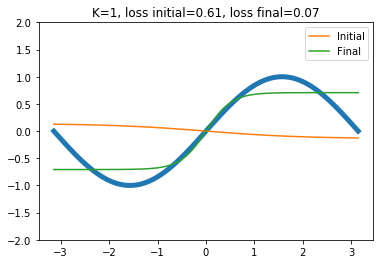

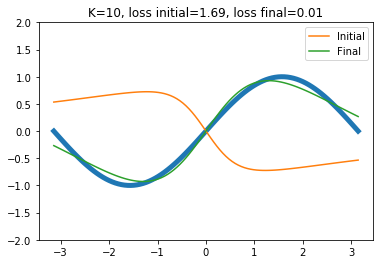

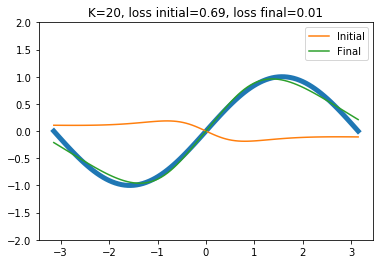

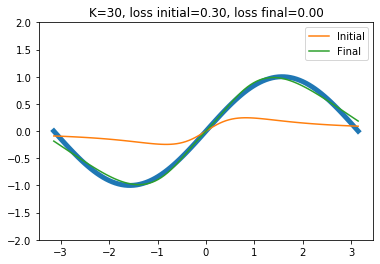

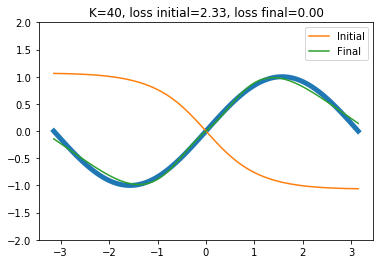

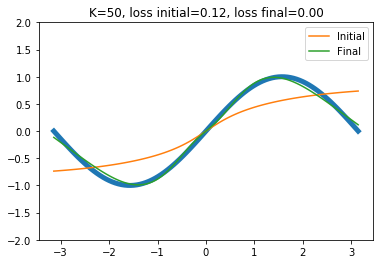

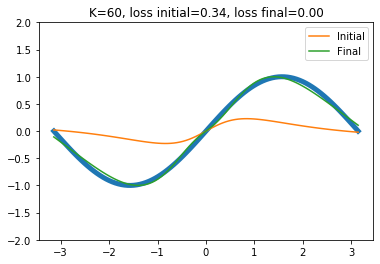

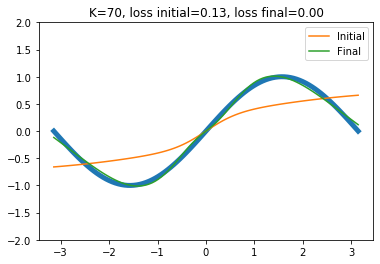

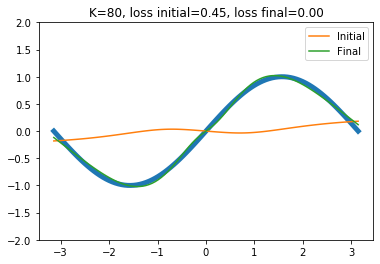

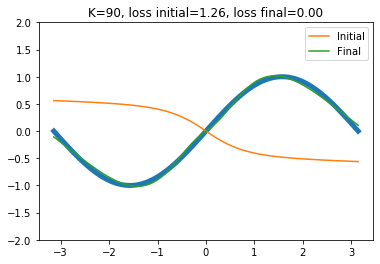

In [196]:
for k in [1]+list(range(10,100,10)):


    np.random.seed(42)
    W1=np.random.normal(0,1,size=(1,k))
    W2=np.random.normal(0,1/np.sqrt(k),size=(k,1))
    W1_original=W1.copy()
    W2_original=W2.copy()

    eta=.01
    for epoch in range(1000):
        for step in range(len(xs)//batch_size):
            x_batch,y_batch=get_batch(xs,ys,batch_size)
            l0=x_batch
            l1=f(l0.dot(W1))
            l1p=fp(l0.dot(W1))
            l2=l1.dot(W2)

            #loss=np.mean((y_batch-l2)**2)
            dW2=2*l1.T.dot(l2-y_batch)/batch_size
            dW1=2*(l1p*l0*W2.T).T.dot(l2-y_batch).T/batch_size
            W2 -= eta * dW2
            W1 -= eta * dW1
    plt.plot(xs,ys,lw=5)    
    plt.plot(xs,forward_pass(xs[:,None],W1_original,W2_original),label='Initial')
    plt.plot(xs,forward_pass(xs[:,None],W1,W2),label='Final')
    plt.legend()
    loss_before_training=np.mean((ys[:,None]-forward_pass(xs[:,None],W1_original,W2_original))**2)
    loss_after_training=np.mean((ys[:,None]-forward_pass(xs[:,None],W1,W2))**2)
    plt.title('K={}, loss initial={:.2f}, loss final={:.2f}'.format(k,loss_before_training,loss_after_training))
    plt.ylim(-2,2)
    plt.show()